# 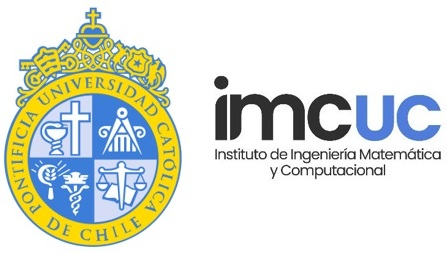  IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre 2023-1**<br>
**Profesor:** Rodrigo A. Carrasco <br>
---

# <h1><center>Actividad 02: Extracción y Revisión de Datos</center></h1>

Esta actividad busca aplicar lo que acabamos de ver en clases sobre extracción de datos y conectarlo con la materia de "Tipos de Datos" que hemos visto en las clases pasadas.

## Instrucciones

Esto Notebook contiene las instrucciones a realizar para la actividad. 

<b>Al finalizarla, deben subir el Notebook y los archivos generados a su repositorio personal, en una carpeta nueva llamada "Actividad 02". Asegúrese que ambas ayudantes tienen acceso a su repositorio para que puedan corregir. La actividad debe ser subida antes del final de la clase. Actualizaciones de su repositorio posteriores a esa fec</b>

Para esta actividad deben hacer lo siguiente:
<ol>
<li>Extraer datos</li>

Para esta actividad usaremos una base de datos de temblores que tiene la USGS (United States Geological Service) en https://www.usgs.gov/.

He preparado una base de datos con todos los temblores con magnitud mayor a 2.5, desde el 1ro de enero hasta el 23 de agosto de este año. La descripción de cada parámetro la pueden encontrar acá: https://earthquake.usgs.gov/earthquakes/feed/v1.0/csv.php
    
Usando la librería `requests` descargue y guarde en un archivo en su repositorio local los datos que están disponibles en el siguiente URL:
    
`url='https://github.com/raxlab/imt2200-data/blob/main/actividades/actividad%2002/query.json?raw=true'`
    
<br>

<li>Formato</li>

¿En qué formato están los datos descargados? Identifique si son datos estructurados, semi-estructurados o no estructurados, explicando claramente por qué los categoriza así.
    
<br>
    
<li>DataFrame de análisis</li>

Usando los elementos que están bajo la categoría `features`, construya un DataFrame con los datos bajados y muestre parte de la tabla usando el método `.head()`.
    
<br>
    
<li>Preguntas</li>

Realice las dos siguientes actividades:

4.1 Profundidad:
    
Entre los tembroles que hay en la base, ¿Cuál fue el más profundo y qué profundidad tuvo? Sea claro en su respuesta.
    
4.2 Gráfico de intensidad:
    
Los temblores están medidos en diferfentes unidades a lo largo de los datos (puede ver la unidad en la columna `magType`), lo que no los hace a todos comparables. Elija un tipo de unidad (puede ser `me`, `mb`, `ml` u otro) y haga aun gráfico mostrando la intensidad de cada temblor a lo largo del tiempo.
    
No olvide poner nombres a los ejes y en el título ponga las unidades elegidas y guarde la imagen con el nombre: `temblores_APELLIDO.jpg` donde reemplace `APELLIDO` por su propio apellido.

El siguiente es un ejemplo usando las unidades `mw` para que use como guía, pero no es necesario que use las mismas unidades o que cambie los tipos de marcadores o líneas para que sean iguales a este ejemplo.
</ol>

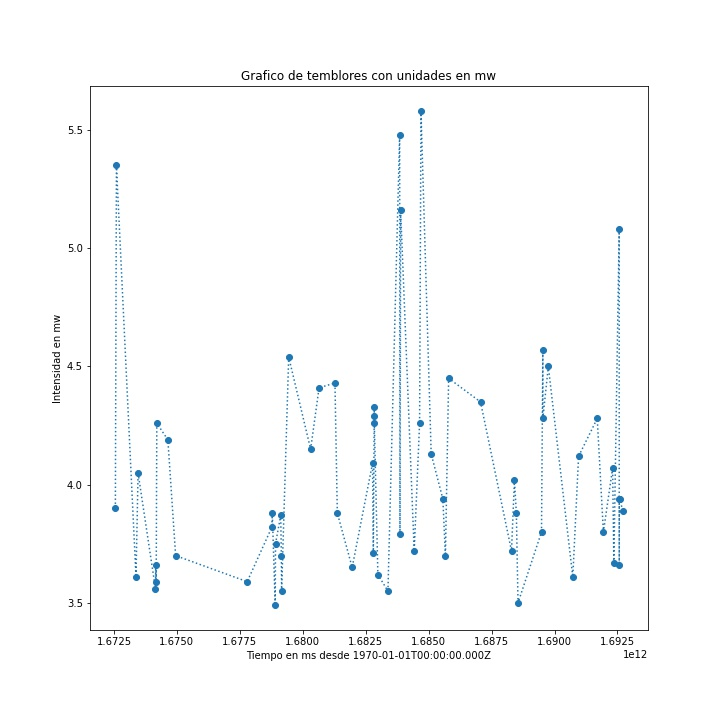

## Rúbrica

- Si han logrado los puntos 1 y 2: 3.0
- Si han logrado hasta el punto 3: 4.0
- Si han logrado hasta el punto 4, pero este último parcialmente: 5.0
- Si han logrado todo: 7.0

## 1. Extraer datos

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import requests
import json

In [2]:
# lectura del sitio web
url='https://github.com/raxlab/imt2200-data/blob/main/actividades/actividad%2002/query.json?raw=true'
respuesta = requests.get(url)

In [3]:
# escribir los datos localmente
open('earthquakes.json','wb').write(respuesta.content)

11788578

In [4]:
# leer el archivo json
earthquakes = json.load(open('earthquakes.json','r', encoding='UTF-8'))
type(earthquakes)

dict

In [5]:
# llaves principales del archivo
earthquakes.keys()

dict_keys(['type', 'metadata', 'features', 'bbox'])

In [6]:
# primer elemento de 'features'
earthquakes['features'][0]

{'type': 'Feature',
 'properties': {'mag': 2.9,
  'place': '45 km NE of Ouzinkie, Alaska',
  'time': 1692791261378,
  'updated': 1692793742040,
  'tz': None,
  'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/ak023asu4hj0',
  'detail': 'https://earthquake.usgs.gov/fdsnws/event/1/query?eventid=ak023asu4hj0&format=geojson',
  'felt': None,
  'cdi': None,
  'mmi': None,
  'alert': None,
  'status': 'automatic',
  'tsunami': 0,
  'sig': 129,
  'net': 'ak',
  'code': '023asu4hj0',
  'ids': ',us7000kqb6,ak023asu4hj0,',
  'sources': ',us,ak,',
  'types': ',origin,phase-data,',
  'nst': None,
  'dmin': None,
  'rms': 0.6,
  'gap': None,
  'magType': 'ml',
  'type': 'earthquake',
  'title': 'M 2.9 - 45 km NE of Ouzinkie, Alaska'},
 'geometry': {'type': 'Point', 'coordinates': [-151.9232, 58.1926, 26.9]},
 'id': 'ak023asu4hj0'}

## 2. Formato

Respuesta:

Los datos son de tipo semi estructurado, al estar en un formato json con elementos anidados adentro de algunos de los campos.

## 3. DataFrame de Análisis

In [7]:
df = pd.DataFrame(earthquakes['features'])
df.head()

,type,properties,geometry,id
0,Feature,"{'mag': 2.9, 'place': '45 km NE of Ouzinkie, A...","{'type': 'Point', 'coordinates': [-151.9232, 5...",ak023asu4hj0
1,Feature,"{'mag': 2.71, 'place': '3 km SSW of Pāhala, Ha...","{'type': 'Point', 'coordinates': [-155.4931640...",hv73539357
2,Feature,"{'mag': 4.3, 'place': '93 km NNW of Lae, Papua...","{'type': 'Point', 'coordinates': [146.8111, -5...",us7000kqau
3,Feature,"{'mag': 4.7, 'place': '15 km E of Pulandian, C...","{'type': 'Point', 'coordinates': [122.1398, 39...",us7000kqap
4,Feature,"{'mag': 2.56, 'place': None, 'time': 169278491...","{'type': 'Point', 'coordinates': [-66.809, 18....",pr71421983


In [8]:
earth_df = pd.json_normalize(earthquakes['features'], sep="_")
earth_df.head()

,type,id,properties_mag,properties_place,properties_time,properties_updated,properties_tz,properties_url,properties_detail,properties_felt,...,properties_types,properties_nst,properties_dmin,properties_rms,properties_gap,properties_magType,properties_type,properties_title,geometry_type,geometry_coordinates
0,Feature,ak023asu4hj0,2.90,"45 km NE of Ouzinkie, Alaska",1692791261378,1692793742040,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",origin,phase-data,",NaN,NaN,0.60,NaN,ml,earthquake,"M 2.9 - 45 km NE of Ouzinkie, Alaska",Point,"[-151.9232, 58.1926, 26.9]"
1,Feature,hv73539357,2.71,"3 km SSW of Pāhala, Hawaii",1692788510490,1692788854040,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",origin,phase-data,",47.0,NaN,0.14,91.0,ml,earthquake,"M 2.7 - 3 km SSW of Pāhala, Hawaii",Point,"[-155.4931640625, 19.1736660003662, 32.9300003..."
2,Feature,us7000kqau,4.30,"93 km NNW of Lae, Papua New Guinea",1692786843757,1692790548040,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",origin,phase-data,",22.0,3.49700,1.00,142.0,mb,earthquake,"M 4.3 - 93 km NNW of Lae, Papua New Guinea",Point,"[146.8111, -5.9021, 95.043]"
3,Feature,us7000kqap,4.70,"15 km E of Pulandian, China",1692785987446,1692791110513,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,8.0,...,",dyfi,origin,phase-data,",68.0,4.01500,0.46,57.0,mb,earthquake,"M 4.7 - 15 km E of Pulandian, China",Point,"[122.1398, 39.4117, 10]"
4,Feature,pr71421983,2.56,None,1692784919970,1692786039030,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",origin,phase-data,",14.0,0.09577,0.33,135.0,md,earthquake,M 2.6 -,Point,"[-66.809, 18.044, 11.81]"


## 4. Preguntas

### 4.1 Profundidad

Los datos de profundidad se encuentran en el tercer elemento adentro del `key` llamado `coordinates` que está adentro del `key` llamado `geometry`. Una forma simple de acceder es transformar la columna `coordinates` a una lista de listas usando el comando `.values.tolist()` y luego crear un DataFrame con las listas obtenidas con el comando `pd.DataFrame(<data>, columns = ['lat', 'long', 'deep'])`. Con eso la columna `deep` tendrá la profundidad de cada evento, que si desean pueden agregar al DataFrame original.

In [9]:
# obtener las coordenadas
coord = earth_df['geometry_coordinates'].values.tolist()
coord_df = pd.DataFrame(coord, columns = ['lat', 'long', 'deep'])
coord_df

,lat,long,deep
0,-151.923200,58.192600,26.900
1,-155.493164,19.173666,32.930
2,146.811100,-5.902100,95.043
3,122.139800,39.411700,10.000
4,-66.809000,18.044000,11.810
...,...,...,...
16637,-66.525100,19.163100,24.000
16638,155.232000,-6.706500,35.000
16639,-115.200800,44.369500,10.000
16640,126.738000,7.139700,79.194


In [10]:
# agregar como columnas
earth_df['deep'] = coord_df['deep']
earth_df

,type,id,properties_mag,properties_place,properties_time,properties_updated,properties_tz,properties_url,properties_detail,properties_felt,...,properties_nst,properties_dmin,properties_rms,properties_gap,properties_magType,properties_type,properties_title,geometry_type,geometry_coordinates,deep
0,Feature,ak023asu4hj0,2.90,"45 km NE of Ouzinkie, Alaska",1692791261378,1692793742040,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,NaN,NaN,0.60,NaN,ml,earthquake,"M 2.9 - 45 km NE of Ouzinkie, Alaska",Point,"[-151.9232, 58.1926, 26.9]",26.900
1,Feature,hv73539357,2.71,"3 km SSW of Pāhala, Hawaii",1692788510490,1692788854040,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,47.0,NaN,0.14,91.0,ml,earthquake,"M 2.7 - 3 km SSW of Pāhala, Hawaii",Point,"[-155.4931640625, 19.1736660003662, 32.9300003...",32.930
2,Feature,us7000kqau,4.30,"93 km NNW of Lae, Papua New Guinea",1692786843757,1692790548040,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,22.0,3.49700,1.00,142.0,mb,earthquake,"M 4.3 - 93 km NNW of Lae, Papua New Guinea",Point,"[146.8111, -5.9021, 95.043]",95.043
3,Feature,us7000kqap,4.70,"15 km E of Pulandian, China",1692785987446,1692791110513,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,8.0,...,68.0,4.01500,0.46,57.0,mb,earthquake,"M 4.7 - 15 km E of Pulandian, China",Point,"[122.1398, 39.4117, 10]",10.000
4,Feature,pr71421983,2.56,None,1692784919970,1692786039030,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,14.0,0.09577,0.33,135.0,md,earthquake,M 2.6 -,Point,"[-66.809, 18.044, 11.81]",11.810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16637,Feature,pr2023001000,3.93,Puerto Rico region,1672543771070,1678575089040,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,23.0,0.84790,0.22,246.0,md,earthquake,M 3.9 - Puerto Rico region,Point,"[-66.5251, 19.1631, 24]",24.000
16638,Feature,us7000j1bs,5.40,"51 km SSW of Panguna, Papua New Guinea",1672542974442,1678575089040,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,130.0,3.94600,0.68,36.0,mww,earthquake,"M 5.4 - 51 km SSW of Panguna, Papua New Guinea",Point,"[155.232, -6.7065, 35]",35.000
16639,Feature,us7000j1bq,2.50,"26 km NW of Stanley, Idaho",1672539177668,1678575089040,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,16.0,0.77400,0.71,82.0,ml,earthquake,"M 2.5 - 26 km NW of Stanley, Idaho",Point,"[-115.2008, 44.3695, 10]",10.000
16640,Feature,us7000j3xk,4.50,"23 km ESE of Manay, Philippines",1672537303755,1678575105040,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,32.0,1.15200,0.47,104.0,mb,earthquake,"M 4.5 - 23 km ESE of Manay, Philippines",Point,"[126.738, 7.1397, 79.194]",79.194


In [11]:
max_depth = earth_df["deep"].max()
print(f'La máxima profundidad fue de {max_depth} mts.')

max_depth_idx = earth_df["deep"].idxmax()
max_depth_idx
print('El evento con mayor profundidad fue:')
earth_df.iloc[[max_depth_idx]]

La máxima profundidad fue de 681.238 mts.
El evento con mayor profundidad fue:


,type,id,properties_mag,properties_place,properties_time,properties_updated,properties_tz,properties_url,properties_detail,properties_felt,...,properties_nst,properties_dmin,properties_rms,properties_gap,properties_magType,properties_type,properties_title,geometry_type,geometry_coordinates,deep
9676,Feature,us6000k2db,4.0,"208 km ENE of Sola, Vanuatu",1680372557114,1685829981040,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,53.0,8.801,0.53,61.0,mb,earthquake,"M 4.0 - 208 km ENE of Sola, Vanuatu",Point,"[169.3241, -13.1462, 681.238]",681.238


### 4.2 Grafico

Importante notar que el elemento `time` de cada medición está en milisegundos desde `1970-01-01T00:00:00.000Z`. No es necesario que transforme ese valor en una fecha, sólo use el tiempo directamente para el eje X de su gráfico. Ya aprenderemos a transformar este tipo de datos en otro formato.

In [12]:
unit = 'mw'
earth_df_unit = earth_df[earth_df['properties_magType']==unit]
earth_df_unit.head()

,type,id,properties_mag,properties_place,properties_time,properties_updated,properties_tz,properties_url,properties_detail,properties_felt,...,properties_nst,properties_dmin,properties_rms,properties_gap,properties_magType,properties_type,properties_title,geometry_type,geometry_coordinates,deep
37,Feature,ci39647202,3.89,"8 km ESE of Ojai, CA",1692704359080,1692790982056,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,536.0,...,117.0,0.02849,0.36,23.0,mw,earthquake,"M 3.9 - 8 km ESE of Ojai, CA",Point,"[-119.1645, 34.4191667, 4.89]",4.89
87,Feature,ci39646098,3.94,"6 km SE of Ojai, CA",1692595516970,1692682148658,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,226.0,...,105.0,0.05227,0.36,27.0,mw,earthquake,"M 3.9 - 6 km SE of Ojai, CA",Point,"[-119.1915, 34.4096667, 1.83]",1.83
104,Feature,ci39645626,3.94,"6 km SE of Ojai, CA",1692569896380,1692715298030,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,247.0,...,100.0,0.05166,0.35,27.0,mw,earthquake,"M 3.9 - 6 km SE of Ojai, CA",Point,"[-119.1921667, 34.4118333, 9.79]",9.79
106,Feature,ci39645586,3.66,"7 km ESE of Ojai, CA",1692569332590,1692675939585,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,188.0,...,98.0,0.02565,0.32,26.0,mw,earthquake,"M 3.7 - 7 km ESE of Ojai, CA",Point,"[-119.168, 34.4321667, 1.63]",1.63
118,Feature,ci39645386,5.08,"7 km SE of Ojai, CA",1692567660970,1692776701759,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,14088.0,...,115.0,0.05069,0.35,27.0,mw,earthquake,"M 5.1 - 7 km SE of Ojai, CA",Point,"[-119.1883333, 34.4085, 4.84]",4.84


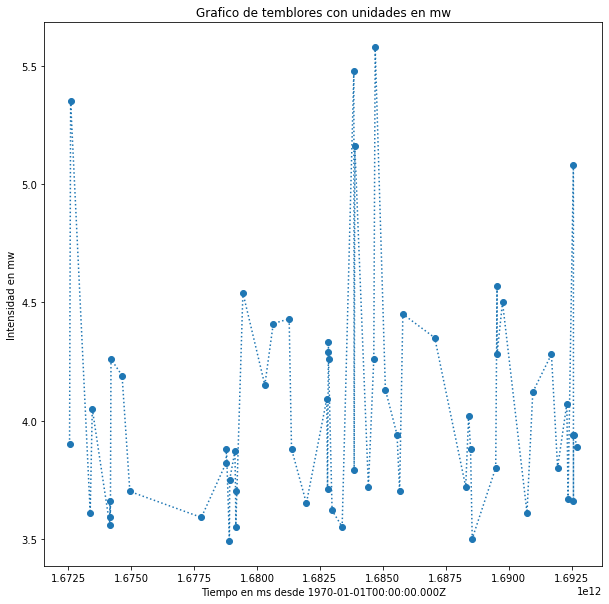

In [13]:
fig = plt.figure(figsize=(10,10))
plt.plot(earth_df_unit['properties_time'], earth_df_unit['properties_mag'], 'o:')
plt.title('Grafico de temblores con unidades en ' + unit)
plt.xlabel('Tiempo en ms desde 1970-01-01T00:00:00.000Z')
plt.ylabel('Intensidad en ' + unit)
plt.show()

In [14]:
fig.savefig('temblores_XXXX.jpg')